In [154]:
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


Text(0.5, 1.0, 'Gráfica acotada de logaritmos')

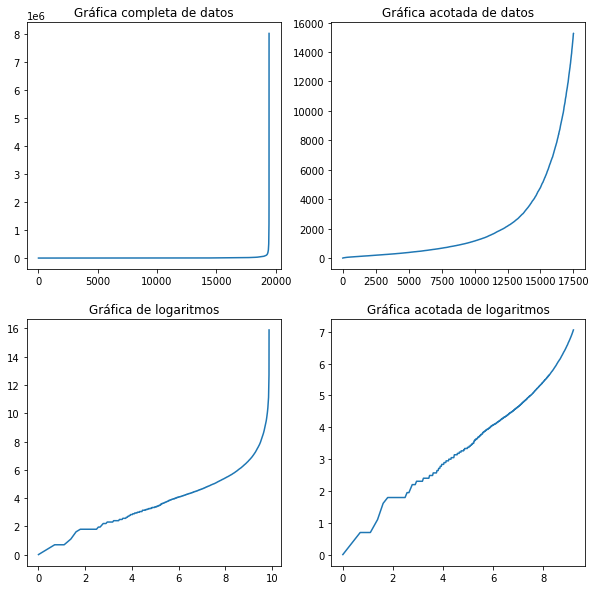

In [182]:
from google.colab import drive
drive.mount('/content/drive')
# importamos el archivo del drive para ver sus datos
file =  '/content/drive/MyDrive/cities.txt'
#tenemos estos datos de la forma de la acuacion potencial y=Cx^e
y = np.loadtxt(file, delimiter='\n')
x = list(range(len(y)))
#estos logaritmos de base 10 son para crear una ecuacion de la forma log(Y)=e*log(x)+log(C) al aplicarlo a la ecuacion potencial, se denota que e representa la pendinete m y log(C) el valor de corte del eje en y
l_y = np.log(y)
l_x = np.log(x)
ll_y = np.log(l_y)
ll_x = np.log(l_x)
fig = plt.figure(figsize=(10,10))
fig.tight_layout()

graf = plt.subplot(2,2,1)
graf.plot(x,y)
graf.set_title('Gráfica completa de datos')
graf = plt.subplot(2,2,2)
graf.plot(x[0:17500],y[0:17500])
graf.set_title('Gráfica acotada de datos')
graf = plt.subplot(2,2,3)
graf.plot(l_x,l_y)
graf.set_title('Gráfica de logaritmos')
graf = plt.subplot(2,2,4)
graf.plot(l_x[0:10000],l_y[0:10000])
graf.set_title('Gráfica acotada de logaritmos')



In [156]:
# tomaremos todas las pendientes equiespaciadas para determinar una suma global y despues la promediamos, no se hace con valores de extremos ya que distorciona muchos los datos, con eso obtenemos el valor de e
s_m = [] #almacenamos las pendientes
for i in range(len(l_y)-1):
  s_m.append((l_y[i+1]-l_y[i])/(l_x[i+1]-l_x[i]))
m = sum(s_m)/len(s_m)
print("El valor de e es: ", m)
#ahora para el valor de la constante que es aplicar el log^(-1)a los valores que seran promediados de b de corte de la recta, esto es log(C)=log(Y)-e*log(x) donde e es el valor de m determinado 
s_b = []
for j in l_y:
  s_b.append(l_y[i]-m*l_x[i])
b = np.exp(sum(s_b)/len(s_b))
print("El valor de C es: ", b)

El valor de e es:  8.712169140306742
El valor de C es:  1.5950116837284033e-31


[4913, 4096, 3375, 2744, 2197, 1728, 1331, 1000, 729, 512, 343, 216, 125, 64, 27, 8, 1, 0]


Text(0.5, 1.0, 'binning')

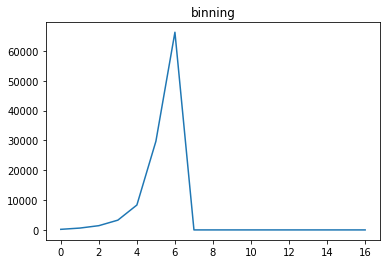

In [196]:
#utilizaremos el valor de e calculado para hacer la ventana binning a ver que tal
#lista con la funcion calculada
x_l = list(range(len(y)))
x_l_a = []
for i in x_l:
  if (sum(x_l_a)<len(y)):
    x_l_a.append(round((x_l[i])**3))
  else:
    break

x_b = x_l_a[::-1]
print(x_b)

binn = []
ac = 0
for j in range(len(x_b)-1):
  binn.append((sum(y[ac:(ac+x_b[j])]))/x_b[j])
  ac = ac + x_b[j]

plt.plot(binn)
plt.title("binning")


Text(0.5, 1.0, 'Acumulada')

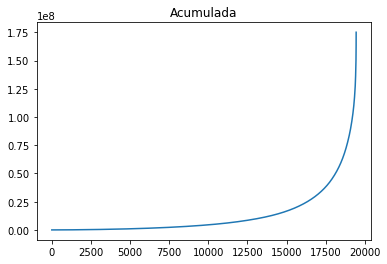

In [198]:
# y la acumulada de los valores
acum = []
suma = 0
for i in range (len(y)):
  acum.append(y[i]+suma)
  suma += y[i]

plt.plot(acum)
plt.title("Acumulada")



Text(0.5, 1.0, 'Datos reales')

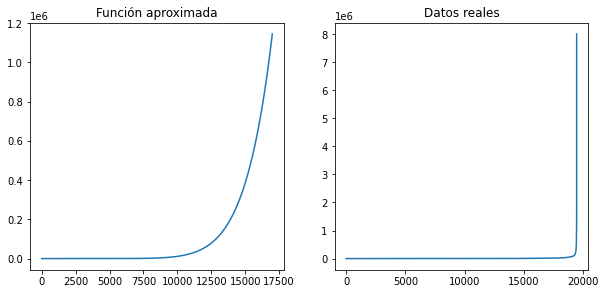

In [185]:
#se observan los valores determinados por la recta de log/log
m_y = []
for i in range(17000):
  m_y.append(b*i**m)

fig1 = plt.figure(figsize=(10,10))
fig1.tight_layout()

graf2 = plt.subplot(2,2,1)
graf2.plot(m_y)
graf2.set_title("Función aproximada")
graf2 = plt.subplot(2,2,2)
graf2.plot(y)
graf2.set_title("Datos reales")